# Introduction:

In the realm of personal fitness and training, harnessing the power of data has become indispensable for enthusiasts and athletes alike. This analysis delves into an individual's training journey, leveraging the wealth of information provided by the Garmin Connect app. By employing Python as the analytical tool, we embark on a comprehensive exploration of training data to decipher patterns, milestones, and overall progress.

The Garmin Connect app, known for its precision in capturing various aspects of workouts, provides a rich dataset encompassing metrics such as heart rate, distance, pace, elevation, and more. This analysis aims to extract actionable insights, shedding light on the nuances of the individual's training regimen.

Throughout this exploration, we will employ Python's versatile data manipulation and analysis libraries, with a primary focus on Pandas for data handling and Matplotlib/Seaborn for visualization. From examining day-to-day variations to identifying trends over extended periods, our approach is tailored to empower individuals with a holistic understanding of their fitness evolution.

Join us as we unravel the layers of personal training data, utilizing Python's analytical prowess to transform raw numbers into meaningful narratives. Through this journey, the individual can gain valuable insights, make informed adjustments to their training routines, and celebrate the milestones achieved in their pursuit of peak fitness. 

Let the analysis begin, where data becomes the compass guiding us through the intricate landscape of personal progress in the world of fitness.


The Analysis will be constructed as follows:

Structural analysis: Understanding the dataset 

Data cleaning: Remove any null or duplicate values

High level visualizations: Visualize some of the key areas within the training data. Counts per activity, Paces during sessions, Most prevalent training time frames (hours, days, weeks, months), heart rate, other intricies per activity (e.g. ascents, swim metrics, 

Projections 

Recommendations

The goal of the analysis is to get a better understanding of the intriciies of the users training program and to make suggestions backed by data to enhance their overall fitness and performance results. 

# Structural Analysis 

In this section we will dive deeper into the inner working of the dataset. We will look to understand how the data is curated, what types of columns we can focus on and check to see if we need to do any cleaning. 

In [25]:
#Lets load in the dataset 
import pandas as pd 


file_path = '/Users/nickshowalter/Downloads/Activities (1).csv'

# Use pandas to read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
    # Now you can work with the DataFrame (df) as needed
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file {file_path} is empty or contains only headers.")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
    


      Activity Type                 Date  Favorite                   Title  \
0           Cycling  2024-02-03 12:52:41     False       Vancouver Cycling   
1           Running  2024-02-02 08:38:01     False       Vancouver Running   
2           Running  2024-01-31 10:02:11     False            Bend Running   
3      Road Cycling  2024-01-30 12:41:29     False       Bend Road Cycling   
4      Road Cycling  2024-01-29 12:05:52     False       Bend Road Cycling   
..              ...                  ...       ...                     ...   
863  Indoor Cycling  2021-11-29 10:06:57     False          Indoor Cycling   
864    Road Cycling  2021-11-24 11:55:54     False  Hillsboro Road Cycling   
865  Indoor Cycling  2021-11-23 20:56:06     False          Indoor Cycling   
866  Indoor Cycling  2021-11-22 18:23:06     False          Indoor Cycling   
867    Road Cycling  2021-11-21 12:58:47     False  Hillsboro Road Cycling   

    Distance Calories      Time  Avg HR  Max HR Aerobic TE  ...

In [26]:
df

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Decompression,Best Lap Time,Number of Laps,Max Temp,Distance.1,Total Descent.1,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Cycling,2024-02-03 12:52:41,False,Vancouver Cycling,1.33,143,00:18:23,101,134,0.7,...,No,18:23.30,1,68.0,1.33,33,00:12:23,00:18:23,58,83
1,Running,2024-02-02 08:38:01,False,Vancouver Running,3.35,282,00:24:57,135,160,2.9,...,No,02:54.34,4,77.0,3.35,95,00:24:47,00:30:36,65,157
2,Running,2024-01-31 10:02:11,False,Bend Running,4.80,445,00:38:22,138,167,3.0,...,No,01:11.51,8,82.4,4.80,102,00:38:20,00:51:27,"3,434","3,496"
3,Road Cycling,2024-01-30 12:41:29,False,Bend Road Cycling,20.12,"1,128",01:06:38,0,0,--,...,No,00:45.71,5,68.0,20.12,719,01:06:27,01:12:48,"3,194","3,558"
4,Road Cycling,2024-01-29 12:05:52,False,Bend Road Cycling,21.42,"1,150",01:25:11,0,0,--,...,No,12:12.91,5,73.4,21.42,748,01:23:54,01:38:26,"3,415","3,697"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Indoor Cycling,2021-11-29 10:06:57,False,Indoor Cycling,0.00,--,01:00:03,0,0,--,...,No,01:00:02.59,1,71.6,0.00,--,00:00:00,01:00:03,390,400
864,Road Cycling,2021-11-24 11:55:54,False,Hillsboro Road Cycling,23.57,"1,372",01:35:24,0,0,--,...,No,02:55.76,6,57.2,23.57,"1,463",01:35:15,01:38:04,232,713
865,Indoor Cycling,2021-11-23 20:56:06,False,Indoor Cycling,0.00,--,00:21:18,0,0,--,...,No,21:17.86,1,64.4,0.00,--,00:00:00,00:21:20,273,278
866,Indoor Cycling,2021-11-22 18:23:06,False,Indoor Cycling,0.00,--,00:22:02,0,0,--,...,No,22:01.89,1,68.0,0.00,--,00:00:00,00:22:02,577,591


array([[<Axes: title={'center': 'Avg HR'}>,
        <Axes: title={'center': 'Max HR'}>,
        <Axes: title={'center': 'Avg Stride Length'}>,
        <Axes: title={'center': 'Avg Vertical Ratio'}>],
       [<Axes: title={'center': 'Avg Vertical Oscillation'}>,
        <Axes: title={'center': 'Avg Ground Contact Time'}>,
        <Axes: title={'center': 'Training Stress Score®'}>,
        <Axes: title={'center': 'Avg Power'}>],
       [<Axes: title={'center': 'Grit'}>,
        <Axes: title={'center': 'Flow'}>,
        <Axes: title={'center': 'Min Temp'}>,
        <Axes: title={'center': 'Number of Laps'}>],
       [<Axes: title={'center': 'Max Temp'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

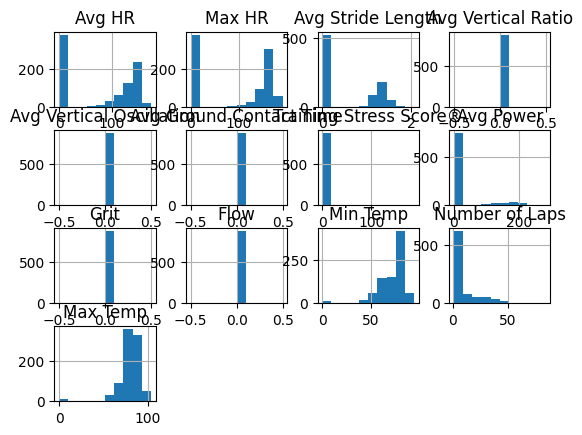

In [4]:
df.hist()

In [5]:
df.describe()

,Avg HR,Max HR,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Training Stress Score®,Avg Power,Grit,Flow,Min Temp,Number of Laps,Max Temp
count,868.000000,868.000000,868.000000,868.0,868.0,868.0,868.000000,868.000000,868.0,868.0,868.000000,868.000000,868.000000
mean,75.967742,89.286866,0.531624,0.0,0.0,0.0,0.216359,24.647465,0.0,0.0,72.727880,10.080645,80.701382
std,68.125987,78.530003,0.660647,0.0,0.0,0.0,6.374347,61.993099,0.0,0.0,14.182667,12.530211,13.296548
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,66.200000,2.000000,78.800000
50%,109.500000,141.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,78.800000,5.000000,82.400000
75%,142.000000,162.000000,1.280000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,82.400000,11.000000,87.800000
max,175.000000,190.000000,2.070000,0.0,0.0,0.0,187.800000,284.000000,0.0,0.0,95.000000,84.000000,104.000000


In [6]:
#lets view all the columns and what types of Data types 
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             868 non-null    object 
 1   Date                      868 non-null    object 
 2   Favorite                  868 non-null    bool   
 3   Title                     868 non-null    object 
 4   Distance                  868 non-null    object 
 5   Calories                  868 non-null    object 
 6   Time                      868 non-null    object 
 7   Avg HR                    868 non-null    int64  
 8   Max HR                    868 non-null    int64  
 9   Aerobic TE                868 non-null    object 
 10  Avg Bike Cadence          868 non-null    object 
 11  Max Bike Cadence          868 non-null    object 
 12  Avg Speed                 868 non-null    object 
 13  Max Speed                 868 non-null    object 
 14  Total Asce

In [19]:
df.corr

<bound method DataFrame.corr of       Activity Type                 Date  Favorite                   Title  \
0           Cycling  2024-02-03 12:52:41     False       Vancouver Cycling   
1           Running  2024-02-02 08:38:01     False       Vancouver Running   
2           Running  2024-01-31 10:02:11     False            Bend Running   
3      Road Cycling  2024-01-30 12:41:29     False       Bend Road Cycling   
4      Road Cycling  2024-01-29 12:05:52     False       Bend Road Cycling   
..              ...                  ...       ...                     ...   
863  Indoor Cycling  2021-11-29 10:06:57     False          Indoor Cycling   
864    Road Cycling  2021-11-24 11:55:54     False  Hillsboro Road Cycling   
865  Indoor Cycling  2021-11-23 20:56:06     False          Indoor Cycling   
866  Indoor Cycling  2021-11-22 18:23:06     False          Indoor Cycling   
867    Road Cycling  2021-11-21 12:58:47     False  Hillsboro Road Cycling   

    Distance Calories      Time

In [22]:
df.isnull().sum()

Activity Type               0
Date                        0
Favorite                    0
Title                       0
Distance                    0
Calories                    0
Time                        0
Avg HR                      0
Max HR                      0
Aerobic TE                  0
Avg Bike Cadence            0
Max Bike Cadence            0
Avg Speed                   0
Max Speed                   0
Total Ascent                0
Total Descent               0
Avg Stride Length           0
Avg Vertical Ratio          0
Avg Vertical Oscillation    0
Avg Ground Contact Time     0
Avg Bike Cadence.1          0
Max Bike Cadence.1          0
Normalized Power® (NP®)     0
Training Stress Score®      0
Max Avg Power (20 min)      0
Avg Power                   0
Max Power                   0
Grit                        0
Flow                        0
Total Strokes               0
Avg. Swolf                  0
Avg Stroke Rate             0
Total Reps                  0
Total Sets

In [12]:
#Lets look at all the unique activities 
unique_activity_types = df['Activity Type'].unique()

unique_activity_types

array(['Cycling', 'Running', 'Road Cycling', 'Strength Training', 'Yoga',
       'Pool Swimming', 'Treadmill Running', 'Indoor Cycling',
       'Open Water Swimming', 'Rowing', 'Hiking', 'Cardio', 'Kayaking',
       'Gym & Fitness Equipment', 'Multisport', 'Swimming'], dtype=object)

In [18]:
# Lets count all the instances where the activity type i

activity_count = pd.DataFrame({'Activity Name': ['Running', 'Swimming', 'Multisport', 'Cycling']})

# Group by activity name and count occurrences
activity_counts = activity_count.groupby('Activity Name').size()

print("Activity counts:")
print(activity_counts)
activity_count


Activity counts:
Activity Name
Cycling       2
Multisport    1
Running       1
Swimming      1
dtype: int64


,Activity Name
0,Running
1,Swimming
2,Multisport
3,Cycling
4,Cycling


In [17]:
activity1 = pd.DataFrame({'Activity Name': ['Running', 'Swimming', 'Multisport', 'Cycling', 'Cycling']})

# Count occurrences of each activity name
activity_counts = activity1['Activity Name'].value_counts()

print("Activity counts:")
print(activity_counts)

Activity counts:
Activity Name
Cycling       2
Running       1
Swimming      1
Multisport    1
Name: count, dtype: int64
